## 2019 Bushfires in Pechey

Pechey is a small rural locality in the Toowoomba Region, Queensland, Australia. The New England Highway passes through the centre of the town. Pechey State Forest occupies the entire south east corner of the area.

On the 21st of November 2019 the ABC news service reported: "Four homes have been lost in a bushfire that has been burning for 10 days in the Pechey area on Queensland's Darling Downs, authorities say."

<img src="data/Pechey_Satellite.png" alt="drawing" width="400" align="left"/>

### Load packages

You start by loading the usual Python libraries to start working on this project.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import datacube
from datacube.storage import masking

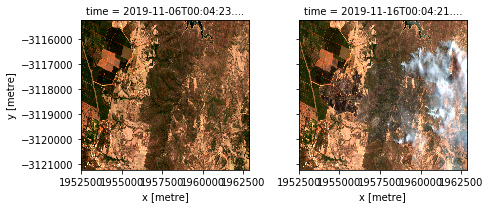

In [20]:
dc = datacube.Datacube(app='bushfires')

query = {'lat': (-27.31, -27.35),
         'lon': (152.06 , 152.16),
         'output_crs': 'EPSG:3577',
         'resolution': (-20, 20),
         'time': ('2019-11-01', '2019-11-22')}

pechey = dc.load(product='s2b_nrt_granule', group_by='solar_day', **query)

pechey = masking.mask_invalid_data(pechey)
#display RGB colors
pechey[['nbart_red', 'nbart_green', 'nbart_blue']].to_array().plot.imshow(robust=True,col='time',col_wrap=5)

The Normalized Burn Ratio (NBR) is an index designed to highlight burnt areas in large fire zones. The formula is similar to NDVI, except that the formula combines the use of both near infrared (NIR) and shortwave infrared (SWIR) wavelengths.

Healthy vegetation shows a very high reflectance in the NIR, and low reflectance in the SWIR portion of the spectrum the opposite of what is seen in areas devastated by fire. Recently burnt areas demonstrate low reflectance in the NIR and high reflectance in the SWIR, i.e. the difference between the spectral responses of healthy vegetation and burnt areas reach their peak in the NIR and the SWIR regions of the spectrum.

<figure>
  <img src="data/Spectral_responses.jpg" alt="drawing" width="400" align="left"/>
  <figcaption> service</figcaption>
</figure>

Comparison of the spectral response of healthy vegetation and burned areas. Source: U.S. Forest

To benefit from the magnitude of spectral difference, NBR uses the ratio between NIR and SWIR bands, according to the formula shown below. A high NBR value indicates healthy vegetation while a low value indicates bare ground and recently burnt areas. Non-burnt areas are normally attributed to values close to zero.

$NBR = \frac{nir-swir2}{nir+swir2}$

### Computing and Visualising NBR indexes
For the returned Dataset we calculate the NBR index for both times:

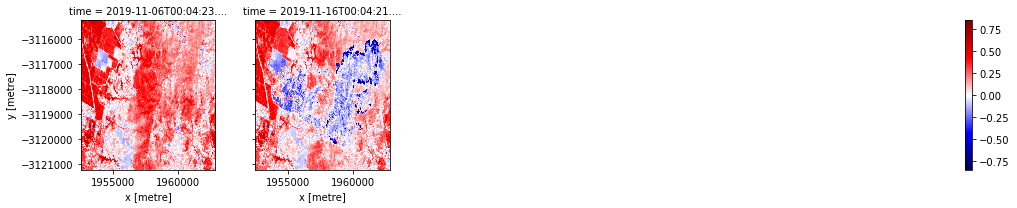

In [27]:
nbr = (pechey['nbar_nir_1']-pechey['nbart_swir_3'])/(pechey['nbar_nir_1']+pechey['nbart_swir_3'])
nbr.plot.imshow(col='time', col_wrap=5, cmap='seismic')

### Temporal change in NBR

Calculate the difference between NBR in after and before the fire event.

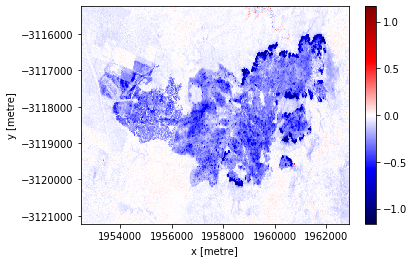

In [28]:
(nbr.isel(time=1)-nbr.isel(time=0)).plot.imshow(cmap='seismic')

In [ ]:
### Categorical Representation of NBR Differences

Convert the different in NBR to a simple classification map with different threshold.

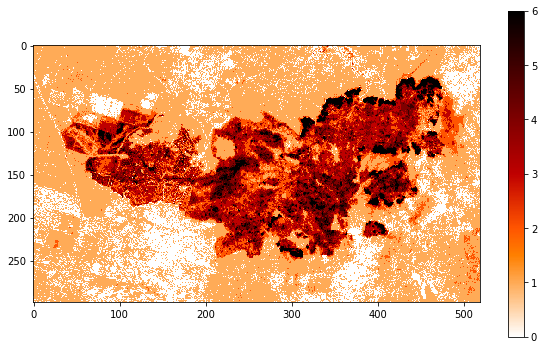

In [32]:
nbr_diff = (nbr.isel(time=1)-nbr.isel(time=0)).values

diff = np.zeros((nbr_diff.shape))

diff[(nbr_diff<0)*(nbr_diff>=-0.1)] = 1
diff[(nbr_diff>-0.2)*(nbr_diff<=-0.1)] = 2
diff[(nbr_diff>-0.3)*(nbr_diff<=-0.2)] = 3
diff[(nbr_diff>-0.4)*(nbr_diff<=-0.3)] = 4
diff[(nbr_diff>-0.5)*(nbr_diff<=-0.4)] = 5
diff[nbr_diff<-0.5] = 6

plt.figure(figsize=(10,6))
plt.imshow(diff,cmap='gist_heat_r')
plt.colorbar()

### Custom color coding

([], <a list of 0 Text yticklabel objects>)

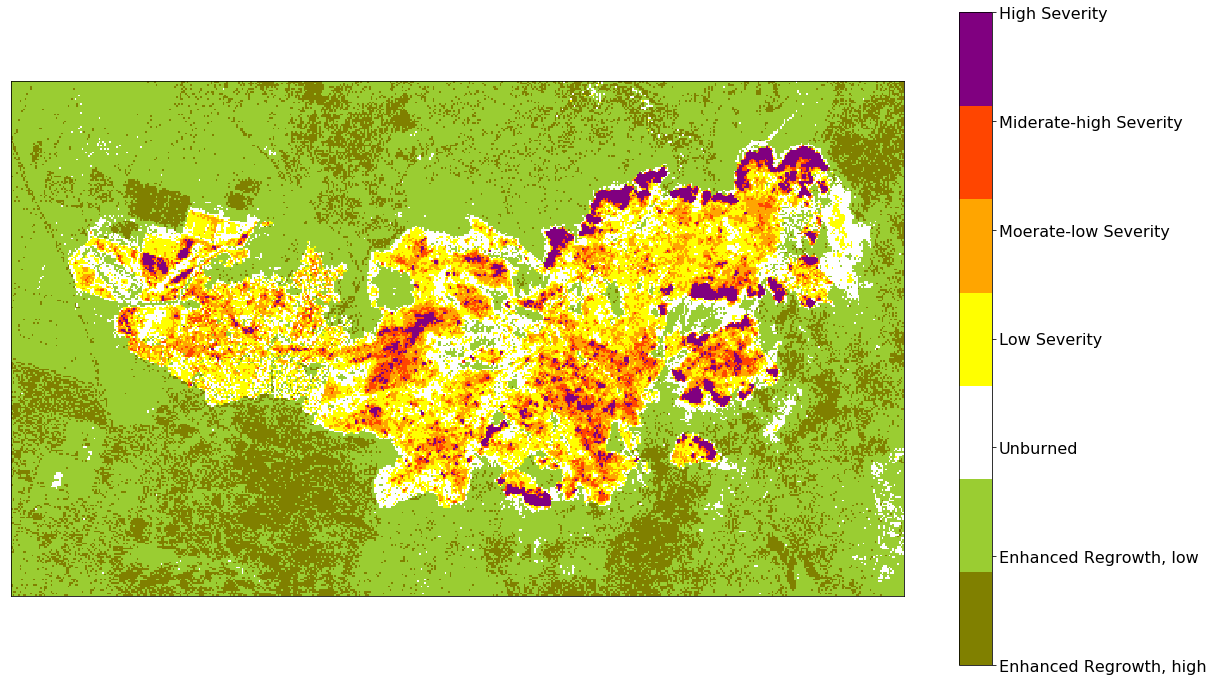

In [34]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(20,12))
cMap = ListedColormap(['olive','yellowgreen','white', 'yellow','orange','orangered','purple'])
plt.imshow(diff,cmap=cMap)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Enhanced Regrowth, high','Enhanced Regrowth, low','Unburned','Low Severity','Moerate-low Severity','Miderate-high Severity','High Severity'],fontsize=16)
plt.xticks([])
plt.yticks([])